In [ ]:
! pip install -r image.txt

In [27]:
import torch
from diffusers import (
    StableCascadeDecoderPipeline,
    StableCascadePriorPipeline,
    StableCascadeUNet,
)

prompt = "A curious inventor tinkering with his mechanical hand."
negative_prompt = ""

prior_unet = StableCascadeUNet.from_pretrained("stabilityai/stable-cascade-prior", subfolder="prior_lite")
decoder_unet = StableCascadeUNet.from_pretrained("stabilityai/stable-cascade", subfolder="decoder_lite")

prior = StableCascadePriorPipeline.from_pretrained("stabilityai/stable-cascade-prior", prior=prior_unet)
decoder = StableCascadeDecoderPipeline.from_pretrained("stabilityai/stable-cascade", decoder=decoder_unet)

prior_output = prior(
    prompt=prompt,
    height=1024,
    width=1024,
    negative_prompt=negative_prompt,
    guidance_scale=4.0,
    num_images_per_prompt=1,
    num_inference_steps=20
)

decoder_output = decoder(
    image_embeddings=prior_output.image_embeddings,
    prompt=prompt,
    negative_prompt=negative_prompt,
    guidance_scale=0.0,
    output_type="pil",
    num_inference_steps=10
).images[0]
decoder_output.save("cascade.png")
Image(r"cascade.png", width=500, height=500) 

  0%|          | 0/20 [00:00<?, ?it/s]

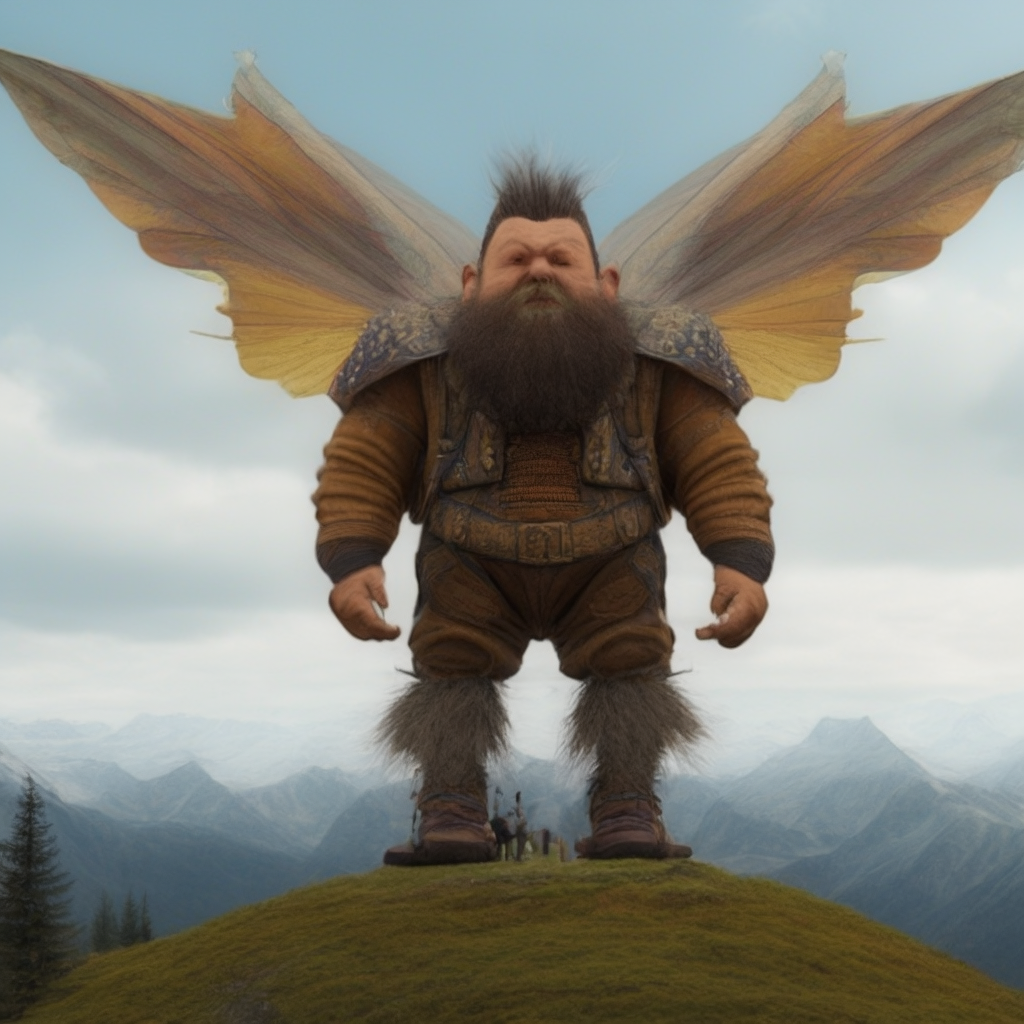

In [18]:
from IPython.display import Image

prompt = "A 3 Meter tall Dwarf that can fly"

Image(r"FlyingDwarf.png", width=500, height=500) 
 

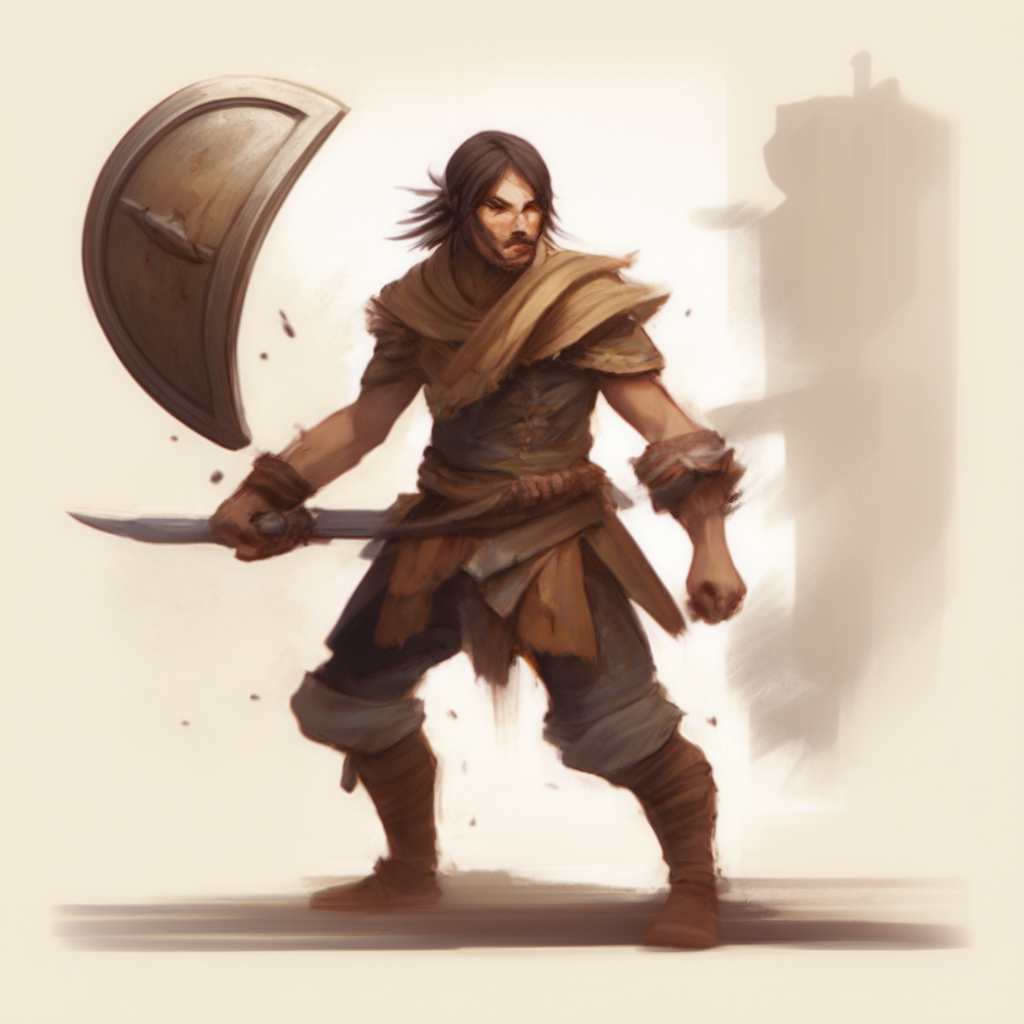

In [25]:
from IPython.display import Image

prompt = "A fighter with short legs, who fights by throwing frying pans."
prompt = "A fighter with short legs, who fights by throwing frying pans."
prompt = "A fighter with short legs, who fights by throwing frying pans."

Image(r"PanFighter.png", width=500, height=500) 
#Image(r"PanFighter2.png", width=500, height=500) 
#Image(r"PanFighter3.png", width=500, height=500) 
 

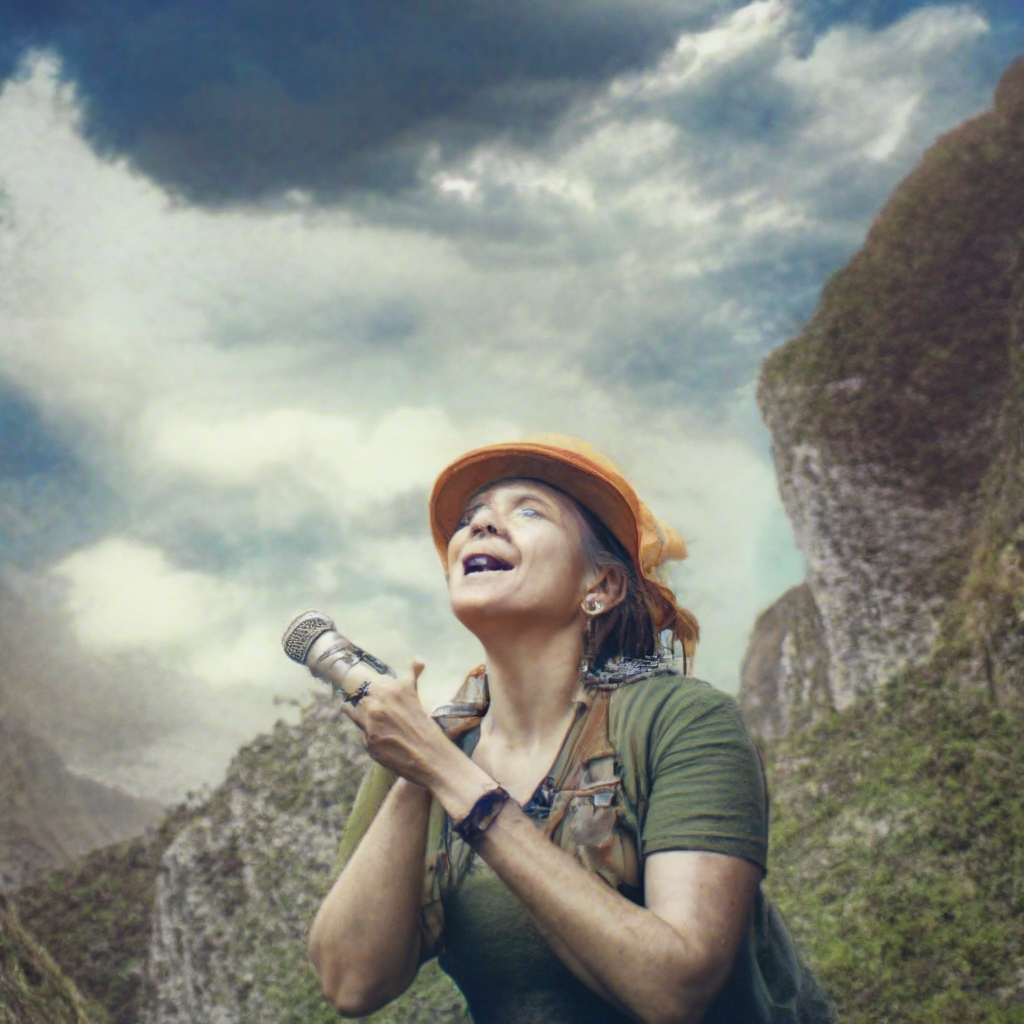

In [26]:
from IPython.display import Image

prompt = "A singing adventurer who tells her stories everywhere."

Image(r"Bard.png", width=500, height=500) 
 

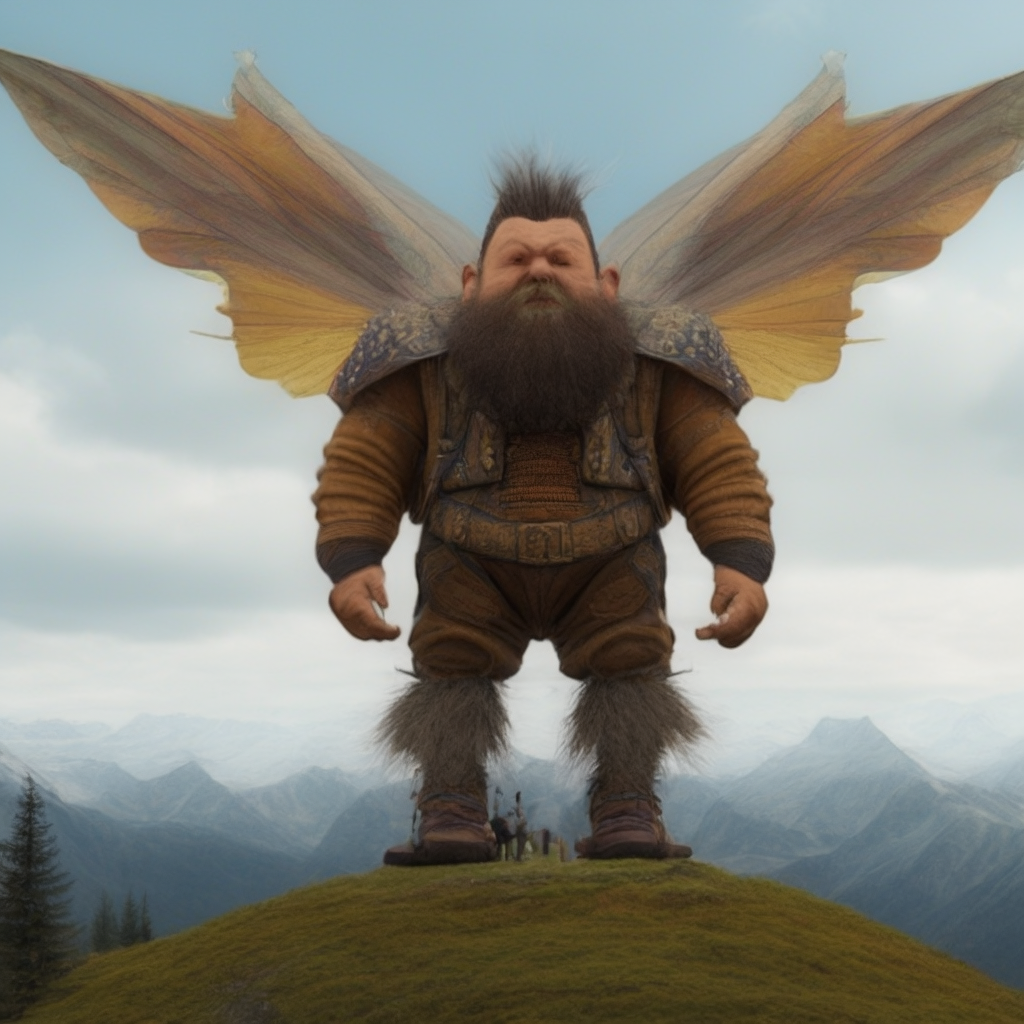

In [ ]:
from IPython.display import Image

prompt = "A curious inventor tinkering with his mechanical hand."

Image(r"Inventor.png", width=500, height=500) 
 